# Titantic passengers and their associated


In [431]:
import pandas
import numpy
import sys
%matplotlib inline
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import numpy as np
import time
import sklearn
from sklearn import metrics, grid_search, cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')
from sklearn.svm import SVC
# fix random seed for reproducibility
plt.rcParams['figure.figsize'] = (15, 6)
from sklearn.datasets.samples_generator import make_blobs
from pandas.tools.plotting import parallel_coordinates

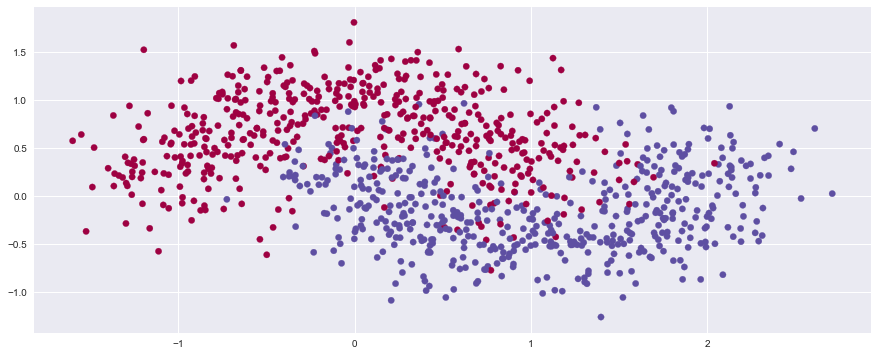

In [458]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(1000, noise=0.30)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)
plt.show()

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=0)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

# Peprocess the data

In [433]:
df = pandas.DataFrame(X,y)

# Prepare the data for classification

In [434]:
dataset = df.values

In [435]:
from sklearn import preprocessing
# for training data
X = dataset.astype(float)
features = preprocessing.scale(X)
target = y

In [436]:
X.shape

(1000, 2)

# Feature Selection

In [437]:
from sklearn.cross_validation import train_test_split
# Extracting 20% validation data
X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0, random_state=17)

## Preproccing

In [438]:
print('Number of training examples',len(X_train))
print('Number of validation examples',len(X_test))

Number of training examples 1000
Number of validation examples 0


In [439]:
from sklearn import preprocessing
# normalize the data attributes
X_train = preprocessing.normalize(X_train)
#X_test = preprocessing.normalize(X_test)
# standardize the data attributes
X_train = preprocessing.scale(X_train)
#X_test = preprocessing.scale(X_test)


# Neural Networks

In [440]:
import seaborn as sns
from sklearn.cross_validation import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l2
from keras.utils import np_utils
labelsTrain = np_utils.to_categorical(y_train)
model = Sequential()
model.add(Dense(4,
                input_shape=(2,), 
                activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')
start_time = time.time()
model.fit(X_train, labelsTrain, verbose=0, batch_size=1, nb_epoch=10)
print("The time for training NN is  %s seconds " % (time.time() - start_time))
score, accuracy = model.evaluate(X_train, labelsTrain, batch_size=1, verbose=0)
print("Test fraction correct (NN-Score) = {:.2f}".format(score))
print("Test fraction correct (NN-Accuracy) = {:.2f}".format(accuracy))

The time for training NN is  3.5168240070343018 seconds 
Test fraction correct (NN-Score) = 0.14
Test fraction correct (NN-Accuracy) = 0.96


In [441]:
modelBuckup = model

# Direct Method Pruning weights

Threshold = 0
constant=1
r=0
for k in range(0, 1000, 100):
    col = []
    sample_x = X_train[k+0:k+100]
    sample_y = labelsTrain[k+0:k+100]
    c=0
    for i in range(0, 4): 
        for j in range(0, 4):
            for b in range(0,100):
                score, accuracy = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                 batch_size=1, verbose=0)
                All_weights=model.get_weights()
                temp = All_weights[2][i][j]
                All_weights[2][i][j]=0
                model.set_weights(All_weights)
                score_New, accuracy_New = model.evaluate(sample_x[b:b+1], sample_y[b:b+1], 
                                                         batch_size=1, verbose=0)
                delta = accuracy_New - accuracy
                reward = max(0,Threshold + delta)/constant
                col.append(reward)
                #print(reward)
                All_weights[2][i][j]= temp
                #print(r,c)
                arry[r][c] = arry[r][c] + reward
                 
                model.set_weights(All_weights)
                #print(delta)
            c = c+1 
    
    r=r+1
    print(r)

In [442]:
arry = np.zeros((10,16))
arryBinar = np.zeros((10,16))

In [443]:
Threshold = 0.0001
constant=1
r=0
for k in range(0, 1000, 100):
    col = []
    sample_x = X_train[k:k+100]
    sample_y = labelsTrain[k:k+100]
    c=0
    for i in range(0, 2): 
        for j in range(0, 4):
            score, accuracy = model.evaluate(sample_x, sample_y, 
                                                 batch_size=1, verbose=0)
            All_weights=model.get_weights()
            temp = All_weights[0][i][j]
            All_weights[0][i][j]=0
            model.set_weights(All_weights)
            score_New, accuracy_New = model.evaluate(sample_x, sample_y, 
                                                         batch_size=1, verbose=0)
            delta = accuracy_New - accuracy
            reward = max(0,Threshold + delta)/constant
            col.append(reward)
                #print(reward)
            All_weights[0][i][j]= temp
                #print(r,c)
            arry[r][c] = arry[r][c] + reward
            if reward>0:
                arryBinar[r][c] = 1
            else:
                arryBinar[r][c] = 0
                 
            model.set_weights(All_weights)
                #print(delta)
            c = c+1 
    
    r=r+1
    print(r)

1
2
3
4
5
6
7
8
9
10


In [444]:
columns = ['w11','w12','w13','w14','w21','w22','w23','w24',
           'w31','w32','w33','w34','w41','w42','w43','w44']
indexes = ["sample1", "sample2","sample3","sample4","sample5",
           "sample6","sample7","sample8","sample9","sample10"]

df1 = pandas.DataFrame(arry, index=indexes)
df2 = pandas.DataFrame(arryBinar, index=indexes)
df1.columns = columns
df2.columns = columns

In [445]:
df1 = df1.T
df2 = df2.T

In [446]:
df1

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
w11,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0000,0.0101,0.0001,0.0001
w12,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
w13,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
w14,0.0201,0.0000,0.0001,0.0101,0.0001,0.0000,0.0101,0.0201,0.0001,0.0201
w21,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000
w22,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
w23,0.0000,0.0001,0.0101,0.0001,0.0001,0.0001,0.0101,0.0001,0.0000,0.0001
w24,0.0000,0.0000,0.0101,0.0001,0.0001,0.0001,0.0101,0.0001,0.0000,0.0001
w31,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
w32,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [447]:
df1/8

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
w11,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000,0.001263,0.000013,0.000013
w12,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
w13,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
w14,0.002512,0.000000,0.000013,0.001262,0.000013,0.000000,0.001263,0.002513,0.000013,0.002513
w21,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000
w22,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013,0.000013
w23,0.000000,0.000013,0.001263,0.000013,0.000013,0.000013,0.001263,0.000013,0.000000,0.000013
w24,0.000000,0.000000,0.001263,0.000013,0.000013,0.000013,0.001263,0.000013,0.000000,0.000013
w31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
w32,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [448]:
df2

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
w11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
w12,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
w13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w14,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
w21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
w22,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
w23,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
w24,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0
w31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
w32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Direct Method Pruning Neurons

In [449]:
N_arry = np.zeros((10,4))
N_arryBinar = np.zeros((10,4))

In [450]:
Threshold = 0
constant=1
r=0
for k in range(0, 1000, 100):
    col = []
    sample_x = X_train[k:k+100]
    sample_y = labelsTrain[k:k+100]
    for i in range(0, 4): 
        score, accuracy = modelBuckup.evaluate(sample_x, sample_y, 
                                                 batch_size=100, verbose=0)
        # Prune the neuron in the layer
        All_weights=modelBuckup.get_weights()
        temp1 = All_weights[0][0][i]
        temp2 = All_weights[0][1][i]
        temp3 = All_weights[1][i]  # Prune the bias
        # Next Layer
        temp4 = All_weights[2][i][0]
        temp5 = All_weights[2][i][1]
        ######################
        All_weights[0][0][i] = 0
        All_weights[0][1][i] = 0
        All_weights[1][i] = 0  # Prune the bias
        # Next Layer
        All_weights[2][i][0] = 0
        All_weights[2][i][1] = 0
        modelBuckup.set_weights(All_weights)
        score_New, accuracy_New = modelBuckup.evaluate(sample_x, sample_y, 
                                                         batch_size=100, verbose=0)
        delta = accuracy_New - accuracy
        reward = max(0,Threshold + delta)/constant
        col.append(reward)
        print(reward)
        #All_weights[0][0][i]= temp1  # before
        #All_weights[0][1][i]= temp2  # before
        #All_weights[1][i]= temp3   # Bais
        #All_weights[2][i][0] = temp4 # after
        #All_weights[2][i][1] = temp5   # after
        
        #print(r)
        N_arry[r][i] = N_arry[r][i] + reward
        if reward>0:
            N_arryBinar[r][i] = 1
        else:
            N_arryBinar[r][i] = 0
                 
        modelBuckup.set_weights(All_weights)
                #print(delta)
    
    r=r+1
    print(r)

0.0
0.0
0.0
0.0
1
0.0
0.0
0.0
0.0
2
0.0
0.0
0.0
0.0
3
0.0
0.0
0.0
0.0
4
0.0
0.0
0.0
0.0
5
0.0
0.0
0.0
0.0
6
0.0
0.0
0.0
0.0
7
0.0
0.0
0.0
0.0
8
0.0
0.0
0.0
0.0
9
0.0
0.0
0.0
0.0
10


In [451]:
All_weights

[array([[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]], dtype=float32),
 array([ 0.,  0.,  0.,  0.], dtype=float32),
 array([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]], dtype=float32),
 array([ 1.45562255, -1.45562255], dtype=float32)]

In [452]:
N_arry

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [453]:
column = ['N1','N2','N3','N4']
indexes = ["sample1", "sample2","sample3","sample4","sample5",
           "sample6","sample7","sample8","sample9","sample10"]

df3 = pandas.DataFrame(N_arry, index=indexes)
df4 = pandas.DataFrame(N_arryBinar, index=indexes)
df3.columns = column
df4.columns = column

In [454]:
df3 = df3.T
df4 = df4.T

In [455]:
df3

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
N1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [456]:
#df3/5

In [457]:
df4

,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10
N1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
N4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
